In [182]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import json
def get_keys(path):
    with open(path) as f:
        return json.load(f)
# keys = get_keys("/Users/Johnny/.secret/yelp_api.json")
# api_key = keys['api_key']
# pip install tmdbsimple #Ctrl+? this line to install tmdbsimple
import tmdbsimple as tmdb
# tmdb.API_KEY = api_key

scrape = False

import ast
import time
import http.client, urllib.request, urllib.parse, urllib.error, base64

api_key = 'ceeaacb7cf024c7485e00ef8457e42dc'

# !pip install isodate

user = 'Drymander'

In [203]:
#Standard python libraries
import pandas as pd
import seaborn as sns
# sns.set_context('talk')
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

# Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
scaler = StandardScaler()
from sklearn import metrics

# Models & Utilities
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore') 

# NLP Libraries
import nltk
import collections
nltk.download('punkt')
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from nltk import regexp_tokenize
import re
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from nltk import ngrams
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
# !pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Drymander History CSV

In [75]:
df = pd.read_csv('DrymanderHistoryExplode.csv')

In [76]:
# df = df.drop(['Unnamed: 0'], axis=1)

df.head(1)

df['MatchId']

0       10010481-1be2-462b-9774-eac5ee152045
1       d8964123-992f-4dd9-8555-40b76a98d4e1
2       c86a93e7-4842-4443-9b90-875b20e3846e
3       79379ee7-036c-4c4a-9945-ef6eec06fed8
4       f16ebbe7-3ddd-4ff8-92de-52904c282d26
                        ...                 
5898    3be18e3f-1354-4f6f-9418-63a02ae630ec
5899    0bbc809c-87d8-423f-88a4-ffb9fc782fd6
5900    f165735b-3687-4a8a-890c-d5f3000d9257
5901    994913a5-26ab-41fe-836e-e082188b3253
5902    db10eb2e-77ca-409c-bc43-018eb0c470f3
Name: MatchId, Length: 5903, dtype: object

## Pull Match

### Basic

In [18]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

matchId = df['MatchId'][75]

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/arena/matches/{matchId}?%s" % params, "{body}", headers)
    response = conn.getresponse()
#     data = response.read().decode('utf-8')
#     json = json.loads(data)
#     print(data)
    data = response.read()
    json1 = json.loads(data)
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################

b'{"PlayerStats":[{"XpInfo":{"PrevSpartanRank":145,"SpartanRank":145,"PrevTotalXP":7818850,"TotalXP":7820103,"SpartanRankMatchXPScalar":2.245,"PlayerTimePerformanceXPAward":533,"PerformanceXP":0,"PlayerRankXPAward":25,"BoostAmount":0,"MatchSpeedWinAmount":0,"ObjectivesCompletedAmount":0},"PreviousCsr":null,"CurrentCsr":null,"MeasurementMatchesLeft":10,"RewardSets":[],"KilledOpponentDetails":[{"GamerTag":"ButtonySea1","TotalKills":3},{"GamerTag":"PacoCG46","TotalKills":5},{"GamerTag":"Drymander","TotalKills":5},{"GamerTag":"Tanny Banany","TotalKills":4}],"KilledByOpponentDetails":[{"GamerTag":"PacoCG46","TotalKills":2},{"GamerTag":"Tanny Banany","TotalKills":2},{"GamerTag":"Drymander","TotalKills":4},{"GamerTag":"ButtonySea1","TotalKills":1}],"FlexibleStats":{"MedalStatCounts":[],"ImpulseStatCounts":[{"Id":"7cda10c8-04c4-4916-8d6e-71a426a61de8","Count":0},{"Id":"fc7095af-dec5-419f-836d-fdd27836aa65","Count":0},{"Id":"0a719185-4780-4706-b9e6-f679fcbc65d6","Count":1},{"Id":"6e1e4e2c-1a57-

In [74]:
match_stats = []

match_stats.append(json1)
match_stats.append(json2)

match_stats

pd.DataFrame(match_stats)

df['MatchId']

KeyError: 'MatchId'

### Multiple

In [84]:
run = True

if run == True:
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
    }

    params = urllib.parse.urlencode({
    })

    match_list = ['babfb117-9d14-407a-ae45-3647de5a48f9',
                 '951683b7-8135-4937-a1a0-8bacc9c34659',
                 '10010481-1be2-462b-9774-eac5ee152045',
                 'd8964123-992f-4dd9-8555-40b76a98d4e1',
                 'c86a93e7-4842-4443-9b90-875b20e3846e']

    # match_list = df['MatchId']

    match_details = []

    i = 0

    for match in match_list:
        try:
            conn = http.client.HTTPSConnection('www.haloapi.com')
    #         conn.request("GET", f"/stats/h5/arena/matches/{match[i]}?%s" % params, "{body}", headers)
            conn.request("GET", f"/stats/h5/arena/matches/{match}?%s" % params, "{body}", headers)
            response = conn.getresponse()
            data = response.read()
            data = json.loads(data)
            match_details.append(data)
    #         print(data)
            conn.close()
            i += 1
            time.sleep(1.1)

            print(f"Match {match} collected and appended to match_details.")
            print(f"{i} match collected out of {len(match_list)} :: {(i / len(match_list)) * 100}% complete.")
        except Exception as e:
            print("error")

#     with open('match_details.pkl', 'wb') as match_details_pickle:
#         pickle.dump(match_details, match_details_pickle)
        
else: 
    print("To run, set run = True")
    print("WARNING - this will overwrite the pickle file")

Match babfb117-9d14-407a-ae45-3647de5a48f9 collected and appended to match_details.
1 match collected out of 5 :: 20.0% complete.
Match 951683b7-8135-4937-a1a0-8bacc9c34659 collected and appended to match_details.
2 match collected out of 5 :: 40.0% complete.
Match 10010481-1be2-462b-9774-eac5ee152045 collected and appended to match_details.
3 match collected out of 5 :: 60.0% complete.
Match d8964123-992f-4dd9-8555-40b76a98d4e1 collected and appended to match_details.
4 match collected out of 5 :: 80.0% complete.
Match c86a93e7-4842-4443-9b90-875b20e3846e collected and appended to match_details.
5 match collected out of 5 :: 100.0% complete.


In [83]:
match_details[2]

{'PlayerStats': [{'XpInfo': {'PrevSpartanRank': 105,
    'SpartanRank': 105,
    'PrevTotalXP': 3504050,
    'TotalXP': 3505469,
    'SpartanRankMatchXPScalar': 2.205,
    'PlayerTimePerformanceXPAward': 573,
    'PerformanceXP': 0,
    'PlayerRankXPAward': 25,
    'BoostAmount': 0,
    'MatchSpeedWinAmount': 0,
    'ObjectivesCompletedAmount': 0},
   'PreviousCsr': None,
   'CurrentCsr': None,
   'MeasurementMatchesLeft': 10,
   'RewardSets': [{'RewardSet': 'be0d2a2d-ee4e-4554-8894-8d23ded1e4a3',
     'RewardSourceType': 2,
     'SpartanRankSource': None,
     'CommendationLevelId': '26bd49b8-ab53-4e0d-ab1f-3c34a86b846c',
     'CommendationSource': '26ef1a37-ce5c-4168-94ea-7893c19c7cfe'}],
   'KilledOpponentDetails': [{'GamerTag': 'Razd up Ice', 'TotalKills': 6},
    {'GamerTag': 'Drymander', 'TotalKills': 5},
    {'GamerTag': 'RatherRude', 'TotalKills': 5},
    {'GamerTag': 'Executioner2394', 'TotalKills': 1}],
   'KilledByOpponentDetails': [{'GamerTag': 'Drymander', 'TotalKills': 4}

In [186]:
with open('match_details.pkl', 'rb') as match_details_pickle:
    match_details_pickle_test = pickle.load(match_details_pickle)
    
mds = match_details_pickle_test[0:20]

In [187]:
mds

[{'PlayerStats': [{'XpInfo': {'PrevSpartanRank': 150,
     'SpartanRank': 150,
     'PrevTotalXP': 28851607,
     'TotalXP': 28852973,
     'SpartanRankMatchXPScalar': 2.25,
     'PlayerTimePerformanceXPAward': 582,
     'PerformanceXP': 0,
     'PlayerRankXPAward': 25,
     'BoostAmount': 0,
     'MatchSpeedWinAmount': 0,
     'ObjectivesCompletedAmount': 0},
    'PreviousCsr': None,
    'CurrentCsr': None,
    'MeasurementMatchesLeft': 10,
    'RewardSets': [],
    'KilledOpponentDetails': [{'GamerTag': 'V3NOM 831', 'TotalKills': 2},
     {'GamerTag': 'Bitfrankido', 'TotalKills': 4},
     {'GamerTag': 'ProtoKulture00', 'TotalKills': 3},
     {'GamerTag': 'Drymander', 'TotalKills': 2}],
    'KilledByOpponentDetails': [{'GamerTag': 'ProtoKulture00',
      'TotalKills': 8},
     {'GamerTag': 'Bitfrankido', 'TotalKills': 4},
     {'GamerTag': 'V3NOM 831', 'TotalKills': 10},
     {'GamerTag': 'Drymander', 'TotalKills': 4}],
    'FlexibleStats': {'MedalStatCounts': [],
     'ImpulseStatCou

## Match Details to Dataframe

Here we are going to try and pull out the data in individual columns rather than working with a massive dataframe.

In [189]:
# data = json.loads(data)

match_details = mds

In [178]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

model_df = pd.DataFrame(columns=model_df_columns)

model_df

Empty DataFrame
Columns: [PlayerWin, Player1, Player2, Player3, Player4, Enemy1, Enemy2, Enemy3, Enemy4]
Index: []

In [254]:
match_details_pickle_test[0]

{'PlayerStats': [{'XpInfo': {'PrevSpartanRank': 150,
    'SpartanRank': 150,
    'PrevTotalXP': 28851607,
    'TotalXP': 28852973,
    'SpartanRankMatchXPScalar': 2.25,
    'PlayerTimePerformanceXPAward': 582,
    'PerformanceXP': 0,
    'PlayerRankXPAward': 25,
    'BoostAmount': 0,
    'MatchSpeedWinAmount': 0,
    'ObjectivesCompletedAmount': 0},
   'PreviousCsr': None,
   'CurrentCsr': None,
   'MeasurementMatchesLeft': 10,
   'RewardSets': [],
   'KilledOpponentDetails': [{'GamerTag': 'V3NOM 831', 'TotalKills': 2},
    {'GamerTag': 'Bitfrankido', 'TotalKills': 4},
    {'GamerTag': 'ProtoKulture00', 'TotalKills': 3},
    {'GamerTag': 'Drymander', 'TotalKills': 2}],
   'KilledByOpponentDetails': [{'GamerTag': 'ProtoKulture00', 'TotalKills': 8},
    {'GamerTag': 'Bitfrankido', 'TotalKills': 4},
    {'GamerTag': 'V3NOM 831', 'TotalKills': 10},
    {'GamerTag': 'Drymander', 'TotalKills': 4}],
   'FlexibleStats': {'MedalStatCounts': [],
    'ImpulseStatCounts': [{'Id': '7cda10c8-04c4-49

In [252]:
model_df = pd.DataFrame()

model_df_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

model_df = pd.DataFrame(columns=model_df_columns)

# model_df_spartanrank = model_df.copy()

x = 1

for match in tqdm(match_details_pickle_test):
    
    try:
        data = match
        df_match = pd.DataFrame()
        columns = [
            'TeamId',
            'Gamertag',
            'SpartanRank',
            'PrevTotalXP',
        ]
        df_match = pd.DataFrame(columns = columns)
        i = 0

        if len(data['PlayerStats']) != 8:
            continue

        for player in data['PlayerStats']:

            player_dic = {}
            # Team ID
            player_dic['TeamId'] = data['PlayerStats'][i]['TeamId']
            # Gamer Tag
            player_dic['Gamertag'] = data['PlayerStats'][i]['Player']['Gamertag']
            # Spartan Rank
            player_dic['SpartanRank'] = data['PlayerStats'][i]['XpInfo']['SpartanRank']
            # Previous Total XP
            player_dic['PrevTotalXP'] = data['PlayerStats'][i]['XpInfo']['PrevTotalXP']
            df_match = df_match.append(player_dic, ignore_index=True)
            i += 1

        model_row = {}

        playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

        if data['TeamStats'][0]['Rank'] == 1:
            winner = 0
        else: winner = 1

        if winner == playerteam:
            model_row['PlayerWin'] = 1
        else:
            model_row['PlayerWin'] = 0


################
        ## testing here
        column = 'PrevTotalXP'
################

        player_xp_sort = df_match[column].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
        enemy_xp_sort = df_match[column].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values

        model_row['Player1'] = player_xp_sort[0]
        model_row['Player2'] = player_xp_sort[1]
        model_row['Player3'] = player_xp_sort[2]
        model_row['Player4'] = player_xp_sort[3]
        model_row['Enemy1'] = enemy_xp_sort[0]
        model_row['Enemy2'] = enemy_xp_sort[1]
        model_row['Enemy3'] = enemy_xp_sort[2]
        model_row['Enemy4'] = enemy_xp_sort[3]

        model_df = model_df.append(model_row, ignore_index=True)

    #     print(f"{x} match collected out of {len(match_details_pickle_test)} :: {(x / len(match_details_pickle_test)) * 100}% complete.")
    #     x += 1
    except:
        continue
    
model_df.head()



100%|██████████| 5903/5903 [01:54<00:00, 51.53it/s] 


PlayerWin   Player1   Player2   Player3   Player4     Enemy1    Enemy2  \
0         0  14888512  10596314   1726224    487793   20790650  11207654   
1         1  14886075   9288816   8542389   6726872   20788776  12241652   
2         0  45675262  27755510  20788314  14884433   34604351  30976866   
3         0  22341443  20802426  14879925   4749906   12240229   9286374   
4         1  58012679  31773078  14877173   5974500  100000000  52265289   

     Enemy3    Enemy4  
0   9290072   5062639  
1  10696184   9513831  
2   9287740   8069166  
3   8067801    757254  
4  51998764  14377863

In [256]:
# model_df.to_csv('first_model.csv')

model_df_spartanrank.to_csv('spartanrank.csv')

In [242]:
model_df_spartanrank

PlayerWin Player1 Player2 Player3 Player4 Enemy1 Enemy2 Enemy3 Enemy4
0            0     148     146      70      37    149    147    146    126
1            1     148     146     145     142    149    147    146    146
2            0     151     150     149     148    150    150    146    145
3            0     149     149     148     122    147    146    145     48
4            1     152     150     148     136    152    152    152    148
...        ...     ...     ...     ...     ...    ...    ...    ...    ...
4228         0      37      17      16       4     31     28     17      4
4229         0      46      37      29       4     31     17     15      4
4230         1      24      12       7       4     44     29     23      4
4231         0      37      34       4       3     23     20     18      8
4232         0      16       4       2       2     18     11      7      7

[4233 rows x 9 columns]

In [202]:
model_df = model_df.replace(100000000, 50000000)

In [218]:
model_1000 = model_df[0:1000]

In [225]:
xp_df = pd.DataFrame()

xp_df['PlayerWin'] = model_df['PlayerWin']
xp_df['PlayerXp'] = model_df['Player1'] + model_df['Player2'] + model_df['Player3'] + model_df['Player4']
xp_df['EnemyXp'] = model_df['Enemy1'] + model_df['Enemy2'] + model_df['Enemy3'] + model_df['Enemy4']

xp_df

PlayerWin   PlayerXp    EnemyXp
0             0   27698843   46351015
1             1   39444152   53240443
2             0  109103519   82938123
3             0   62773700   30351658
4             1  110637430  168641916
...         ...        ...        ...
4228          0     703452     766925
4229          0    1509497     552766
4230          1     280104    1172366
4231          0     882503     495296
4232          0      96548     218096

[4233 rows x 3 columns]

In [257]:
model_df.head()

PlayerWin   Player1   Player2   Player3   Player4     Enemy1    Enemy2  \
0         0  14888512  10596314   1726224    487793   20790650  11207654   
1         1  14886075   9288816   8542389   6726872   20788776  12241652   
2         0  45675262  27755510  20788314  14884433   34604351  30976866   
3         0  22341443  20802426  14879925   4749906   12240229   9286374   
4         1  58012679  31773078  14877173   5974500  100000000  52265289   

     Enemy3    Enemy4  
0   9290072   5062639  
1  10696184   9513831  
2   9287740   8069166  
3   8067801    757254  
4  51998764  14377863

# Model

In [258]:
# Assigning X and y for train test split

features = model_df.drop(['PlayerWin'], axis=1)
target = model_df['PlayerWin']


X = features
y = target

y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=8)

print(X_train.shape)
print(X_test.shape)

(2963, 8)
(1270, 8)


In [259]:
model_log = LogisticRegression(random_state=8)
model_log.fit(X_train, y_train)

LogisticRegression(random_state=8)

In [260]:
def evaluate_model(model, X_train, X_test, y_train=y_train, 
                   y_test=y_test, cmap='Greens', normalize=None,
                   classes=None,figsize=(10,4)):
    
    """
    model :: classifier user desires to evaluate
    X_train :: X training data
    X_test :: X test data
    y_train :: y_train data
    y_test :: y_train data
    cmap :: color palette of confusion matrix
    normalize :: set to True if normalized confusion matrix is desired
    figsize :: desired plot size

    """
    
    # Print model accuracy
    print(f'Training Accuracy: {model.score(X_train,y_train):.2%}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.2%}')
    print('')
    
    # Print classification report
    y_test_predict = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_predict,
                                        target_names=classes))
    
    # Plot confusion matrix
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                  ax=ax[0])
    
    #Plot ROC curves
    with sns.axes_style("darkgrid"):
        curve = metrics.plot_roc_curve(model,X_train,y_train,ax=ax[1])
        curve2 = metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
        curve.ax_.grid()
        curve.ax_.plot([0,1],[0,1],ls=':')
        fig.tight_layout()
        plt.show()

Training Accuracy: 52.21%
Test Accuracy: 49.21%

              precision    recall  f1-score   support

           0       0.48      0.25      0.33       634
           1       0.50      0.73      0.59       636

    accuracy                           0.49      1270
   macro avg       0.49      0.49      0.46      1270
weighted avg       0.49      0.49      0.46      1270



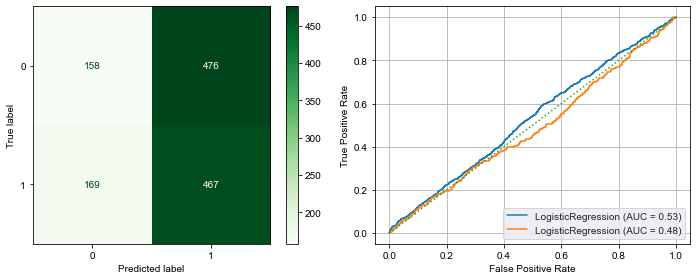

In [261]:
evaluate_model(model_log, X_train, X_test)

In [162]:
df_mr = pd.DataFrame()

df_mr_columns = [
    'PlayerWin',
    'Player1',
    'Player2',
    'Player3',
    'Player4',
    'Enemy1',
    'Enemy2',
    'Enemy3',
    'Enemy4',
]

df_mr = pd.DataFrame(columns=df_mr_columns)

df_mr

Empty DataFrame
Columns: [PlayerWin, Player1, Player2, Player3, Player4, Enemy1, Enemy2, Enemy3, Enemy4]
Index: []

### Winner Column

In [174]:
model_row = {}

playerteam = df_match.loc[df_match['Gamertag'] == user, 'TeamId'].values[0]

playerteam

if data['TeamStats'][0]['Rank'] == 1:
    winner = 0
else: winner = 1

if winner == playerteam:
    model_row['PlayerWin'] = 1
else:
    model_row['PlayerWin'] = 0

winner
playerteam

model_row

{'PlayerWin': 0}

### Player 1-4

In [164]:
player_xp_sort = df_match['PrevTotalXP'].loc[df_match['TeamId'] == playerteam].sort_values(ascending=False).values
enemy_xp_sort = df_match['PrevTotalXP'].loc[df_match['TeamId'] != playerteam].sort_values(ascending=False).values

model_row['Player1'] = player_xp_sort[0]
model_row['Player2'] = player_xp_sort[1]
model_row['Player3'] = player_xp_sort[2]
model_row['Player4'] = player_xp_sort[3]
model_row['Enemy1'] = enemy_xp_sort[0]
model_row['Enemy2'] = enemy_xp_sort[1]
model_row['Enemy3'] = enemy_xp_sort[2]
model_row['Enemy4'] = enemy_xp_sort[3]

model_row

{'PlayerWin': 1,
 'Player1': 25805777,
 'Player2': 19434141,
 'Player3': 14861920,
 'Player4': 8902122,
 'Enemy1': 50968277,
 'Enemy2': 11918131,
 'Enemy3': 5985796,
 'Enemy4': 3504050}

In [166]:
df_mr = df_mr.append(model_row, ignore_index=True)

df_mr

PlayerWin   Player1   Player2   Player3  Player4    Enemy1    Enemy2  \
0         1  25805777  19434141  14861920  8902122  50968277  11918131   

    Enemy3   Enemy4  
0  5985796  3504050

In [34]:
dfm = pd.DataFrame(match_details)

dfm.to_csv('match_details.csv')

In [211]:
dfm.drop(['PlayerStats'], axis=1).to_csv('match_details_example3.csv')

In [212]:
dfm['PlayerStats'].to_csv('match_details_playerstats.csv')

In [26]:
df_ps = dfm['PlayerStats'].apply(pd.Series)

df_ps[0].apply(pd.Series)

XpInfo PreviousCsr CurrentCsr  \
0  {'PrevSpartanRank': 105, 'SpartanRank': 105, '...        None       None   
1  {'PrevSpartanRank': 105, 'SpartanRank': 105, '...        None       None   

   MeasurementMatchesLeft                                         RewardSets  \
0                      10  [{'RewardSet': 'be0d2a2d-ee4e-4554-8894-8d23de...   
1                      10  [{'RewardSet': 'be0d2a2d-ee4e-4554-8894-8d23de...   

                               KilledOpponentDetails  \
0  [{'GamerTag': 'Razd up Ice', 'TotalKills': 6},...   
1  [{'GamerTag': 'Razd up Ice', 'TotalKills': 6},...   

                             KilledByOpponentDetails  \
0  [{'GamerTag': 'Drymander', 'TotalKills': 4}, {...   
1  [{'GamerTag': 'Drymander', 'TotalKills': 4}, {...   

                                       FlexibleStats  \
0  {'MedalStatCounts': [], 'ImpulseStatCounts': [...   
1  {'MedalStatCounts': [], 'ImpulseStatCounts': [...   

                                       CreditsEarned MetaCommendationDeltas  \
0  {'Result': 2, 'TotalCreditsEarned': 746, 'Spar...                     []   
1  {'Result': 2, 'TotalCreditsEarned': 746, 'Spar...                     []   

   ... TotalGamesTied TotalTimePlayed TotalGrenadeKills  \
0  ...              0  PT8M13.072393S                 0   
1  ...              0  PT8M13.072393S                 0   

                                         MedalAwards  DestroyedEnemyVehicles  \
0  [{'MedalId': 2838259753, 'Count': 1}, {'MedalI...                      []   
1  [{'MedalId': 2838259753, 'Count': 1}, {'MedalI...                      []   

   EnemyKills                                        WeaponStats  \
0          []  [{'WeaponId': {'StockId': 4086418184, 'Attachm...   
1          []  [{'WeaponId': {'StockId': 4086418184, 'Attachm...   

                                            Impulses TotalSpartanKills  \
0  [{'Id': 2556889090, 'Count': 2}, {'Id': 419131...                17   
1  [{'Id': 2556889090, 'Count': 2}, {'Id': 419131...                17   

   FastestMatchWin  
0             None  
1             None  

[2 rows x 54 columns]

## Match Events

In [59]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/matches/{matchId}/events?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


b'{"GameEvents":[{"RoundIndex":0,"TimeSinceStart":"PT0.1540342S","EventName":"RoundStart"},{"Player":{"Gamertag":"l Jesko l","Xuid":null},"WeaponAttachmentIds":[1080484403,2721988302,2758383128],"WeaponStockId":4153405209,"TimeSinceStart":"PT35.0078799S","EventName":"WeaponPickup"},{"Player":{"Gamertag":"l Jesko l","Xuid":null},"WeaponAttachmentIds":[2758383128],"WeaponStockId":1390323522,"TimeSinceStart":"PT35.0078799S","EventName":"WeaponPickup"},{"Player":{"Gamertag":"l Jesko l","Xuid":null},"TimeSinceStart":"PT35.0078799S","EventName":"PlayerSpawn"},{"Player":{"Gamertag":"TWITCH Kobzz","Xuid":null},"WeaponAttachmentIds":[2758383128],"WeaponStockId":1390323522,"TimeSinceStart":"PT35.0238851S","EventName":"WeaponPickup"},{"Player":{"Gamertag":"TWITCH Kobzz","Xuid":null},"WeaponAttachmentIds":[2758383128],"WeaponStockId":2902827823,"TimeSinceStart":"PT35.0238851S","EventName":"WeaponPickup"},{"Player":{"Gamertag":"TWITCH Kobzz","Xuid":null},"TimeSinceStart":"PT35.0238851S","EventName"

## Weapons Meta

In [55]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", "/metadata/h5/metadata/weapons?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    my_json = data.decode('utf8').replace("'", '"')
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


b'[{"name":"Flagnum","description":null,"type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/flagnum-282503fb5260409a844e29eeae45bbca.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fflagnum-282503fb5260409a844e29eeae45bbca.png&width=332&hash=376WQLPQ8ra7Xbij6jhSp6avT3QG3ccjBS%2fKVFs4Efw%3d","isUsableByPlayer":true,"id":"2244200496","contentId":"cc556937-465f-4286-a989-e4ac28e6988b"},{"name":"Spartan","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-7d33bbefeee740f8a43e3e081a5b7aea.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-7d33bbefeee7

In [56]:
my_json

'[{"name":"Flagnum","description":null,"type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/flagnum-282503fb5260409a844e29eeae45bbca.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fflagnum-282503fb5260409a844e29eeae45bbca.png&width=332&hash=376WQLPQ8ra7Xbij6jhSp6avT3QG3ccjBS%2fKVFs4Efw%3d","isUsableByPlayer":true,"id":"2244200496","contentId":"cc556937-465f-4286-a989-e4ac28e6988b"},{"name":"Spartan","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-7d33bbefeee740f8a43e3e081a5b7aea.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-7d33bbefeee74

In [43]:
[{"name":"Flagnum","description":null,"type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/flagnum-282503fb5260409a844e29eeae45bbca.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fflagnum-282503fb5260409a844e29eeae45bbca.png&width=332&hash=376WQLPQ8ra7Xbij6jhSp6avT3QG3ccjBS%2fKVFs4Efw%3d","isUsableByPlayer":true,"id":"2244200496","contentId":"cc556937-465f-4286-a989-e4ac28e6988b"},{"name":"Spartan","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-7d33bbefeee740f8a43e3e081a5b7aea.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-7d33bbefeee740f8a43e3e081a5b7aea.png&width=332&hash=dwLka%2fmOgqyoZhE4czunU6Awgo3XClrV1M%2bWFof83rE%3d","isUsableByPlayer":false,"id":"3168248199","contentId":"447b227e-18eb-4060-904a-1cf709638958"},{"name":"SHADE AA TURRET","description":"Shade AA Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shade-plasma-turret-type2-43a3e7bd5506473d8b21db5529132500.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshade-plasma-turret-type2-43a3e7bd5506473d8b21db5529132500.png&width=332&hash=DMp8f6sqvTQQdtdrMktKI8osrwk9VUAwO21qfUV7dtc%3d","isUsableByPlayer":true,"id":"2989142719","contentId":"0a98a07c-51df-44b8-9359-982458bff2ae"},{"name":"SHADE PLASMA TURRET","description":"Shade Plasma Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shade-plasma-turret-a46b99d2048c46f18511568c722ad301.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshade-plasma-turret-a46b99d2048c46f18511568c722ad301.png&width=332&hash=yReKqrjSq2RAGw6N3L4r27Ch0MXbKCaAfgZ5c%2bQTg0w%3d","isUsableByPlayer":true,"id":"698769165","contentId":"8d6b0d58-f536-4685-b19c-0bbe6bd7fc96"},{"name":"Environmental Explosives","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/explosives/explosives-040c30c3a5f3402abfb616e7d18c2395.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fexplosives%2fexplosives-040c30c3a5f3402abfb616e7d18c2395.png&width=332&hash=tv3HlwTBv5ChH2KebQAHYTNmOo7ADIksqKIhIu6W13M%3d","isUsableByPlayer":true,"id":"47178948","contentId":"fd412929-4a3f-49c0-b392-5521012f33fc"},{"name":"Gauss Turret","description":"Precision anti-tank coilgun.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/gauss-turret-5f9a751679634bce91a77bf95c7e2d67.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fgauss-turret-5f9a751679634bce91a77bf95c7e2d67.png&width=332&hash=ty4y%2f1sEuT8eMQwX6cVXuZ3KL9bAHaf1A0LPabuLpzE%3d","isUsableByPlayer":true,"id":"4233134183","contentId":"cfa92e74-82be-4b25-a0cd-4f7a97f2bf8c"},{"name":"ROCKET POD TURRET","description":"Multirole missile launcher.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/missile-rocket-turret-12e04f30fdbf4dc2b9a1f37a907f5234.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmissile-rocket-turret-12e04f30fdbf4dc2b9a1f37a907f5234.png&width=332&hash=EuZSiblHWcj3CRx3LzuVo1Fw2jq9HnCS6NOTBPNYkgQ%3d","isUsableByPlayer":true,"id":"2907783784","contentId":"ec137dd1-82d1-4ef4-809a-f838420416c1"},{"name":"Chaingun Turret","description":"Rotary autocannon.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/chaingun-turret-0cbad9f5d3a74313adba3d6faf43592e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fchaingun-turret-0cbad9f5d3a74313adba3d6faf43592e.png&width=332&hash=P70p8qnHLXmbuf7tPzofDzeiIXYThkFjMB74JqyD0vk%3d","isUsableByPlayer":true,"id":"2988661926","contentId":"fc78a02f-5f48-4134-a5a8-a92e34d9142d"},{"name":"Incineration Cannon","description":"Heavy cannon that fires a powerful energy charge. Main charge spawns submunitions on impact.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/incineration-cannon-2caa0e0e074543c79c9ff8d0fe289752.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fincineration-cannon-2caa0e0e074543c79c9ff8d0fe289752.png&width=332&hash=8T1ASpOwRZxeUIlLWGn39KDYwvUNVEYdvHRpe1w%2blVw%3d","isUsableByPlayer":true,"id":"4086418184","contentId":"f26f8097-a383-4038-ba31-70de7b994c73"},{"name":"Splinter Turret","description":"Fires hardlight projectiles that break apart and detonate after impact.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/splinter-turret-6a1cad04de8a49ea9370d6bf285f9b29.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsplinter-turret-6a1cad04de8a49ea9370d6bf285f9b29.png&width=332&hash=OR%2baWnYY76UZOtWm4BVXMYAPJQquCBFJDlRx47RxoEQ%3d","isUsableByPlayer":true,"id":"1749823285","contentId":"890bf973-addf-45a1-80c9-71fecc38f77f"},{"name":"UNSC AUTO TURRET","description":"UNSC Auto Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":false,"id":"2031824349","contentId":"65289c8a-cc54-4503-b1aa-29938b20d436"},{"name":"SCORPION ANTI INFANTRY TURRET","description":"Scorpion Infantry Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/scorpion-turret-3acbd9d1a40d4f71ba4721b1ac1c230e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fscorpion-turret-3acbd9d1a40d4f71ba4721b1ac1c230e.png&width=332&hash=Vv2qdYARoN%2bkGscXEQz1ntxVZ071UbMVmuVjK3b3xoI%3d","isUsableByPlayer":true,"id":"244872079","contentId":"b504ed6b-8335-477a-9834-42c90b4a2d88"},{"name":"WRAITH ANTI INFANTRY TURRET","description":"Wraith Infantry Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/wraith-turret-8c7f77f080f34ab9b5d97509485f9daf.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fwraith-turret-8c7f77f080f34ab9b5d97509485f9daf.png&width=332&hash=9F05IIx2%2ffu2ZBYgnsjpLkDp9HToePCOiCtdmwvYhMs%3d","isUsableByPlayer":true,"id":"1701501807","contentId":"c293d75e-4528-44fc-8be2-b3b101bff2bd"},{"name":"Plasma Caster","description":"Fires plasma bolts that can be bounced off terrain to reach targets behind cover. Bolts stick and will chain-detonate when fired using Smart-Link.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-caster-8373c86c00cb4cffb36f29381d2f1025.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-caster-8373c86c00cb4cffb36f29381d2f1025.png&width=332&hash=FeGzpg78yr5g8uuwCPkC7ZkN2Wie%2f0la8NMDEbBl2VM%3d","isUsableByPlayer":true,"id":"4054937266","contentId":"006861b7-ca17-4032-a998-99ae1cb1fc4f"},{"name":"FORERUNNER BEAM TURRET","description":"Forerunner Beam Turret deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":false,"id":"514985629","contentId":"f3c11ff9-d960-481b-b733-e7994c001f0f"},{"name":"SPIRIT CHIN GUN","description":"Spirit Chin Gun deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spirit-chain-gun-1884effb163d43bb82b198fdd43dbe11.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspirit-chain-gun-1884effb163d43bb82b198fdd43dbe11.png&width=332&hash=y%2bwojiZdKkre25hosAHW30JWNa87lzts9NruwwzEybs%3d","isUsableByPlayer":false,"id":"1797509873","contentId":"55ae77f4-3111-4d34-a1ae-ee82ef69f6cb"},{"name":"Carbine","description":"Carbine with Holoscope. Versatile semi-automatic rifle renowned for its accuracy and long range. New production models use a streamlined manufacturing process and reactive materials in place of radioisotopes for coating projectiles.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/covenant-carbine-30811039456f475f805eaa52762820b0.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fcovenant-carbine-30811039456f475f805eaa52762820b0.png&width=332&hash=Zin20muBr8qdP73e6MEp23Qwug0dAaImKkcxtX%2b1xgA%3d","isUsableByPlayer":true,"id":"4108759423","contentId":"a32d5b79-aa24-4897-8850-55ffc7450d6e"},{"name":"PHANTOM CHIN GUN","description":"Phantom Chin Gun deployable for campaign and warzone","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/phantom-chin-gun-a446b325e7494d29a8cabe7e693548da.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fphantom-chin-gun-a446b325e7494d29a8cabe7e693548da.png&width=332&hash=GszX%2ffGgOqVHYsp40W8g1IdLn6sxFh%2bbHtqrtcNs0aQ%3d","isUsableByPlayer":false,"id":"3717288512","contentId":"1b15c7be-a807-460a-987a-60037c346b9b"},{"name":"LightRifle","description":"Accurate and powerful, LightRifles were the standard-issue weapon of ancient Promethean warriors.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/light-rifle-0c9fc99241fc414a85d6e210fed36d04.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2flight-rifle-0c9fc99241fc414a85d6e210fed36d04.png&width=332&hash=tIJEZDRfA5lPq2QmM6Ql66UCCyNFECIxJXWqlSFDJLE%3d","isUsableByPlayer":true,"id":"2511447508","contentId":"59026c44-1498-4580-99ef-c45fad75bc12"},{"name":"Storm Rifle","description":"Rapid-fire plasma rifle effective out to medium range when Smart-Link is engaged. Sustained fire can temporarily overheat the weapon.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/covenant-storm-rifle-a440460289a54237832d39becaaf0046.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fcovenant-storm-rifle-a440460289a54237832d39becaaf0046.png&width=332&hash=BdfDk%2fhQyjjfC3cPrWYvadmKNtKU5fLlKyuj1QhlSRA%3d","isUsableByPlayer":true,"id":"2133511419","contentId":"611e61ad-5b14-4631-8eef-f8bb6a14b1f0"},{"name":"Binary Rifle","description":"Semi-automatic sniper energy rifle with variable-zoom 4x/9x optics. Use Smart-Link when engaging targets at long range.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/binary-rifle-79e0c4a1283641bda007e0d861ded31b.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbinary-rifle-79e0c4a1283641bda007e0d861ded31b.png&width=332&hash=s0YVJm3ACjKC2uS31lvIGShLBOn9BXeLOxeskO0xeLA%3d","isUsableByPlayer":true,"id":"2140505068","contentId":"5130eeaa-d67e-4001-a548-20408dffe0d8"},{"name":"Plasma Pistol","description":"Semi-automatic energy pistol that fires packets of superheated plasma. Holding down the trigger, then releasing, will fire a tracking overcharge shot with an EMP effect that will disable vehicles and knock out shields.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-pistol-1a65716f9b894b8496b501c69b4c05d9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-pistol-1a65716f9b894b8496b501c69b4c05d9.png&width=332&hash=EXTEQAQlvspdmk0AJWHxJfJKVBhejMoyiZPWQjzN0Ro%3d","isUsableByPlayer":true,"id":"524558978","contentId":"c8dd731b-0766-4315-8ec0-8922f40cc101"},{"name":"Scorpion","description":"Main battle tank armed with a heavy cannon and pintle-mounted heavy machine gun. This new iteration of the storied Scorpion is half the mass of the old M808 yet has nearly identical firepower and armor protection.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/scorpion-6c7fb074aa1c42549a765a294e78c3c7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fscorpion-6c7fb074aa1c42549a765a294e78c3c7.png&width=332&hash=%2fCkx7J14PgzU9QjJ5ndSwhhMk0%2bTZa6nlpEndWfyTHc%3d","isUsableByPlayer":true,"id":"1730553442","contentId":"c7e2f6aa-b86c-4131-b5d7-71bb35fcd0c4"},{"name":"Suppressor","description":"Fully-automatic energy rifle effective at short range. Accuracy significantly improves when using Smart-Link.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/suppressor-5ee536381da34f48abb542a29a51a898.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsuppressor-5ee536381da34f48abb542a29a51a898.png&width=332&hash=wJMTrh6lL7uesgj0OU9W3Cene%2fInCVHLAd5ZUUMK5Lg%3d","isUsableByPlayer":true,"id":"2681172411","contentId":"fc839d35-d0e3-4234-b9ff-70c428d8cca7"},{"name":"Phaeton","description":null,"type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/vtol-5c02f48bfdf246c0aab7f738687b5744.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fvtol-5c02f48bfdf246c0aab7f738687b5744.png&width=332&hash=p%2b56GNOiSUDlhjfn%2ffB2d457Le7Vdw752wer9fGX0Ts%3d","isUsableByPlayer":true,"id":"3394982816","contentId":"011cd325-c192-477c-8767-23b99546031d"},{"name":"Boltshot","description":"Burst-fire energy pistol. Bolts home-in on close range targets. This new functionality appears to be related to other adaptations the Prometheans have displayed since the disappearance of the Didact.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/boltshot-c9cdbdb343524915b1d80bc8b3047286.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fboltshot-c9cdbdb343524915b1d80bc8b3047286.png&width=332&hash=ufVTmfMPj5xIOpOyGMEn%2fV6Pa5Qb5%2b%2fb%2b520Px3XAX0%3d","isUsableByPlayer":true,"id":"4153405209","contentId":"4ead2f3c-c9ba-41d0-bf69-a3ac1d4b4e32"},{"name":"Mantis","description":"Combat walker armed with heavy machine gun and missile launcher. Missiles can lock-on to aerial targets. Melee unleashes a devastating stomp attack. Extended use of the heavy machine gun will cause it to overheat.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/mantis-88bcd6e59a3d469aa380620309a5e8a5.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fmantis-88bcd6e59a3d469aa380620309a5e8a5.png&width=332&hash=bQ58hOrEtc%2b3XuXpGvrmzK31OhA5Ctt8mUlqXZ%2bMmRU%3d","isUsableByPlayer":true,"id":"3227919741","contentId":"71347094-6fdb-437a-862c-59db1b936aa6"},{"name":"Banshee","description":"Agile ground attack aircraft. Armed with rapid-fire plasma cannons and secondary fuel rod cannon. Can perform acrobatic rolls and loops or high-speed boosts.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/banshee-9626ac8f343644f3a592a0b7d49faac6.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fbanshee-9626ac8f343644f3a592a0b7d49faac6.png&width=332&hash=%2bwTKTSuyqU6fPV%2f0JYmjU2YOh4SvpWEcKMVyHF7gL3U%3d","isUsableByPlayer":true,"id":"419783896","contentId":"91fafc39-ee57-4ae7-ad93-b36e6ac34561"},{"name":"Wraith","description":"Assault tank armed with a heavy plasma mortar and pintle-mounted plasma cannon. Can boost for quick sprints. The latest Wraith revisits an ancient Sangheili design that is easier to manufacture and less costly to lose.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/wraith-bd8975a1a57348a2b8a2588e9a5040f1.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwraith-bd8975a1a57348a2b8a2588e9a5040f1.png&width=332&hash=vr34Tpz64SEzQReJpo2bu0kn5bBSbyOGwpDwCXhzF0M%3d","isUsableByPlayer":true,"id":"1206711506","contentId":"c12685a5-956c-483b-8254-70765a23d863"},{"name":"Warthog","description":"Warthog armed reconnaissance configuration fitted with a rotary autocannon on a full-rotation turret mount. ","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/warthog-951f2406dea44d229662df881d89272e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwarthog-951f2406dea44d229662df881d89272e.png&width=332&hash=fgVOMTjIBBWxAMSe5%2bGu6VRwzTrdizeFN7F6YDNtbMw%3d","isUsableByPlayer":true,"id":"4028516791","contentId":"4dcc7ed4-6d15-4170-bad2-fdf28705fbae"},{"name":"Assault Rifle","description":"Assault Rifle with Projection Sight. Standard-issue fully-automatic rifle effective at short to medium range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/assault-rifle-72bb6004e7804715935013ca745cadb9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fassault-rifle-72bb6004e7804715935013ca745cadb9.png&width=332&hash=5aSvHLqf3tm3VL4EyZXk9WkfZAD%2fwaVy2T22GduWhqw%3d","isUsableByPlayer":true,"id":"313138863","contentId":"9f00429a-687a-4e0e-8690-cde5ba010bcf"},{"name":"SMG","description":"SMG with CQB Sight. Rapid fire submachine gun best suited for close-quarters combat while leveraging Smart-Link.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/smg-74d80a6bc14c4c64aa08db838e775db7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsmg-74d80a6bc14c4c64aa08db838e775db7.png&width=332&hash=6Ikf%2fFGrIZ8eeJfpuA6Ti%2bn5cdzoFu66S4ctCjr3RZo%3d","isUsableByPlayer":true,"id":"723388907","contentId":"5d4f4df8-9684-40d8-9d25-a15481a1047f"},{"name":"Scattershot","description":"Short-range semi-automatic energy shotgun. Energy projectiles ricochet off hard surfaces and exhibit homing behavior.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/scattershot-7453d1d0f9a149dfb2649675322780cd.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fscattershot-7453d1d0f9a149dfb2649675322780cd.png&width=332&hash=cAtlmS3kBkUWiC8goxDP4DPNo%2f%2ffLsK2ojbQhNKQL6Y%3d","isUsableByPlayer":true,"id":"3808094875","contentId":"6e033e34-9ebe-4120-9abb-59c5d55159e0"},{"name":"Ghost","description":"Fast attack bike fitted with dual rapid-fire plasma cannons. Can boost for extra speed, at the expense of maneuverability.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/ghost-3d8125d531f14b5499eb203bb6689c19.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fghost-3d8125d531f14b5499eb203bb6689c19.png&width=332&hash=8iIZszbCW4BymoY%2ftsU02sVjy9k1RPVcIR9WPhE%2bNLA%3d","isUsableByPlayer":true,"id":"3010146366","contentId":"d760ed2e-8b55-44c0-9b47-fc5c8d44910d"},{"name":"Railgun","description":"Powerful single-shot coilgun that requires a short charge cycle before firing. Will automatically fire if the charge is held for too long.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/railgun-ce34452629a74a0899a091f0f2e52f89.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2frailgun-ce34452629a74a0899a091f0f2e52f89.png&width=332&hash=eh%2b4lDppbLwobJ7CtqVzSGgfvCv7qVABYIqP%2fq3QMCs%3d","isUsableByPlayer":true,"id":"3682788176","contentId":"c5fe5ab1-6583-443f-abc6-4c513847fdd1"},{"name":"Mongoose","description":"Heavy-duty all-terrain quad bike. A passenger can be accommodated on the rear-facing seat. ","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/wargoose-6bfb5d0d8ff34c67ac7537dbecea9f59.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2fwargoose-6bfb5d0d8ff34c67ac7537dbecea9f59.png&width=332&hash=Alksbp7GujgkvJ5tsRpgWqCOoUqpeIvuRAY9Y9dFWRk%3d","isUsableByPlayer":true,"id":"1063919886","contentId":"f9b11bd7-7959-4639-94de-a9df329579a5"},{"name":"Hydra Launcher","description":"Portable mini-missile launcher. Use Smart-Link to lock-on to targets before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/hydra-ae5ed76d25b048dd98ca20efd8818935.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhydra-ae5ed76d25b048dd98ca20efd8818935.png&width=332&hash=Igp%2bCCVwYELH%2biLOj8nQjtUFtI0%2fb7WO7XQ96mvNiZk%3d","isUsableByPlayer":true,"id":"1579758889","contentId":"0dd40ad7-9120-4fdf-881a-ecda58fedff3"},{"name":"Spartan Laser","description":"Anti-vehicle laser. Requires a short warmup time before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spartan-laser-1dce3448ef73469ab8f9e2d38c9d531c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspartan-laser-1dce3448ef73469ab8f9e2d38c9d531c.png&width=332&hash=dmKMiRo6bmqIWsY%2btMFku6K4YsmlBhWyd2wQMGe8hsA%3d","isUsableByPlayer":true,"id":"3885603197","contentId":"7f28cc32-55a6-4bce-ae30-8703ac50f2e3"},{"name":"Needler","description":"Exotic weapon which fires shards that home in on short-range targets. If multiple shards strike a target they will detonate - creating a \\"supercombine\\" explosion. Will bounce off heavy armor, such as that used by vehicles and Hunters.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/needler-5690d414b19a4b2d83be15baaffa2fe9.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fneedler-5690d414b19a4b2d83be15baaffa2fe9.png&width=332&hash=N00LDPlPB5dg3BgRm%2fDef2bQs8MR0c4DJsEeAtIR5ck%3d","isUsableByPlayer":true,"id":"2050745863","contentId":"f6c599f2-2c86-447d-944d-fa604b17136a"},{"name":"Shotgun","description":"Short-ranged semi-automatic shotgun. Get up-close and personal to maximize damage.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/shotgun-35bca45ecb8440479bfbab9e075f4302.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fshotgun-35bca45ecb8440479bfbab9e075f4302.png&width=332&hash=aRRxaPLRsA9%2bxwd5%2fA43ghuA0p7jr3L9mX0TtUI8bIo%3d","isUsableByPlayer":true,"id":"3484334713","contentId":"39c25783-6a10-4b13-a586-546eae1c99bc"},{"name":"SAW","description":"Rapid-fire light machine gun with a large ammo capacity.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/saw-0f3ee44a215d4a57b6e578cd760a3fb0.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsaw-0f3ee44a215d4a57b6e578cd760a3fb0.png&width=332&hash=pfWvwfHvmhEmIgcc2SJ2hfon7EHNIAwJwECLlAayPps%3d","isUsableByPlayer":true,"id":"2278207101","contentId":"93970223-4c24-4c73-9ce0-af44299e529d"},{"name":"Fuel Rod Cannon","description":"Magazine-fed, shoulder-fired heavy weapon that fires explosive fuel rods. Modern fuel rod cannons are significantly more accurate than those used by the old Covenant; a refinement sourced from the multi-species workshops on Venezia.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/fuel-rod-cannon-041deffe5b6e4ca283e10b2d3cc734df.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2ffuel-rod-cannon-041deffe5b6e4ca283e10b2d3cc734df.png&width=332&hash=2V1VcxW79vt%2f8BddOjOIN3V2JKaXX%2bmHelsB%2bdEfO7k%3d","isUsableByPlayer":true,"id":"2670072722","contentId":"1e4a8790-77cd-4106-9047-5ba66053e4fc"},{"name":"FRAG GRENADE","description":"Frag grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/frag-grenade-475ae914b9154a0fad1097e1bd93705c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2ffrag-grenade-475ae914b9154a0fad1097e1bd93705c.png&width=332&hash=NoUz5nJ9pJWI4daAx%2b%2fGpb%2f1bxmeSqBBrZ0Q3Ue1rcE%3d","isUsableByPlayer":true,"id":"4106030681","contentId":"2355c403-e88b-4897-9698-e731cfdaf8d7"},{"name":"Energy Sword","description":"Deadly plasma-based melee weapon. Successful strikes deplete the sword"s limited energy charge.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/energy-sword-2c1b6748e5bc4354b832d9369fe814bc.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fenergy-sword-2c1b6748e5bc4354b832d9369fe814bc.png&width=332&hash=91cKKp6Ay7GfyEHB4r8nRvzZplD7nl1mCLFx21HjJro%3d","isUsableByPlayer":true,"id":"2650887244","contentId":"d83e562a-5cef-4e86-8231-b1f5ee4e710b"},{"name":"Beam Rifle","description":"Long-range semi-automatic energy rifle with variable-zoom 4x/10x optics. Use Smart-Link to line up headshots for one-shot kills.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/beam-rifle-3a4d95cd93a94895a23b217d812f8c7d.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbeam-rifle-3a4d95cd93a94895a23b217d812f8c7d.png&width=332&hash=oh4MRfkENVebE%2bbbqj2jIWI%2bnz1D0fPyGzkcXUf2%2b7k%3d","isUsableByPlayer":true,"id":"2862629816","contentId":"8d299779-5e9b-4273-aecf-b5727c62fcd7"},{"name":"SPLINTER GRENADE","description":"Splinter grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/splinter-grenade-a3734115247e4709af0ab1f53a9c6a55.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsplinter-grenade-a3734115247e4709af0ab1f53a9c6a55.png&width=332&hash=h03UgF2mSwcB3o56FpX5%2bj3Q1N5dfjsCh17Ur%2bSOtw0%3d","isUsableByPlayer":true,"id":"3190813201","contentId":"4eb8f0d1-4c77-438b-9719-c450b3b875db"},{"name":"DMR","description":"DMR with Longshot Sight. Powerful and accurate semi-automatic rifle best used at mid to long-range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/dmr-13a45fa2ad074b5cb70a0ef81f36f0e1.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fdmr-13a45fa2ad074b5cb70a0ef81f36f0e1.png&width=332&hash=WDK4RgJy%2blGjzyU1%2fCeHy5MjHgisKjGLvk0%2fZxFoj%2fE%3d","isUsableByPlayer":true,"id":"523953283","contentId":"71a5cf7d-c8f1-4ab5-8771-1854338bbb85"},{"name":"PLASMA GRENADE","description":"Plasma grenade deployable for campaign","type":"Grenade","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma-grenade-e63ed2a67258459882ea3d73ca173237.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma-grenade-e63ed2a67258459882ea3d73ca173237.png&width=332&hash=zhaeCiBVuRlstZfXhYcfmtur5N8W7r3HXnpMBMECvhA%3d","isUsableByPlayer":true,"id":"2460880172","contentId":"a1ede5b9-3819-42d3-a3b3-a276571547a2"},{"name":"Sniper Rifle","description":"Semi-automatic multi-role heavy rifle with variable-zoom 4x/9x optics. Best used at long range in conjunction with Smart-Link.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/sniper-rifle-b6d462a6c57d4297953d12e93e468053.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fsniper-rifle-b6d462a6c57d4297953d12e93e468053.png&width=332&hash=BiMAWO4c0GfjEiyp%2fYMyGApujlhorPHFr8tEr49q02Y%3d","isUsableByPlayer":true,"id":"669296699","contentId":"22cad0dc-8af0-44d2-8654-f80a0c231955"},{"name":"Rocket Launcher","description":"Shoulder-fired heavy weapon widely issued to UNSC Army, Marine Corps, and Spartan infantry to counter enemy vehicles and Promethean Knights. Can fire two missiles per magazine. Lock-on to air targets using Smart-Link before firing.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/rocket-launcher-fc1d373704564123ae76cf41de665d18.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2frocket-launcher-fc1d373704564123ae76cf41de665d18.png&width=332&hash=87HtwFUlzN7GoQu%2bEeySijltY9fM79i7XpN1B%2bPvvaw%3d","isUsableByPlayer":true,"id":"723523180","contentId":"f4aa9fab-fc38-4cbe-a777-0d6eab03bcc4"},{"name":"Magnum","description":"Magnum with Projection Sight. Standard-issue semi-automatic heavy pistol. Use Smart-Link and call your shots.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/magnum-d98e366992d4489bbb34e75e1ad7c2f6.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmagnum-d98e366992d4489bbb34e75e1ad7c2f6.png&width=332&hash=T2cr3zTZxUhcD7EWVZMgThYlYG%2brBbbZd2z8rp2dMz0%3d","isUsableByPlayer":true,"id":"4096745987","contentId":"9cf1c3ce-bf33-4c20-b9ae-56de0f6f0652"},{"name":"Battle Rifle","description":"Battle Rifle with Recon Sight. Standard-issue burst-fire rifle that can excel at any engagement range.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/br-07be901f5fac4a68aeea3dac36decc06.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbr-07be901f5fac4a68aeea3dac36decc06.png&width=332&hash=375YR8hAEtNlO6Vq7RPB6V56bdbd4ermo6n6UrrK2ss%3d","isUsableByPlayer":true,"id":"424645655","contentId":"9b2089b8-5652-465a-ad78-78a36761fcac"},{"name":"SPNKr Rocket Launcher","description":"Make some noise! Twin-tube shoulder-fired rocket launcher with Smart-Link sights. Rockets can lock-on to air targets.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/spnkr-25d0ddbcefd14a859bceef38875b28a3.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fspnkr-25d0ddbcefd14a859bceef38875b28a3.png&width=332&hash=YZndAuIi%2bqCqGGCvgHjNQSI1FEB5ZcW5946sExuvqSA%3d","isUsableByPlayer":true,"id":"2902827823","contentId":"e7d65a17-2517-458c-ac3f-1dd48405718e"},{"name":"Halo 2 Battle Rifle","description":"BR with Classic Sight. Reliable firepower never goes out of style. Battle Rifle with full-screen zoom.","type":"Standard","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/halo-2-battle-rifle-967c07de6b78414eafa429be2eb7ab48.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhalo-2-battle-rifle-967c07de6b78414eafa429be2eb7ab48.png&width=332&hash=B67pwYaY0I3WpJu5t2D11AD%2bpfb4Vqn3x41DZtJU3JY%3d","isUsableByPlayer":true,"id":"4222743534","contentId":"798a60dd-410a-4493-ba48-22e9dfd8ddff"},{"name":"Ball","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/assault-ball-weapon-e1cffc1788c849d8938bf104fe55e07a.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fassault-ball-weapon-e1cffc1788c849d8938bf104fe55e07a.png&width=332&hash=XinxuuCPidF6%2fISNfNygk%2bm8Hp9%2b%2b9xAg8ZPCu9Pr1k%3d","isUsableByPlayer":true,"id":"393532233","contentId":"1e2acd11-6bbb-4f62-855b-21a8b84f5a7d"},{"name":"Gravity Hammer","description":"Brutally effective melee weapon that combines a hammer with repurposed gravitic impellers on the striking face. Each smash unleashes a damaging area-of-effect pulse with knockback. Regular melee attacks are weaker, but do not consume energy.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/gravity-hammer-07ce6812c81c4c67a6dd68dbb7456355.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fgravity-hammer-07ce6812c81c4c67a6dd68dbb7456355.png&width=332&hash=AflzYP165PLTA%2fVLKmehUKYhO7vCycNsO2GNox7ZM24%3d","isUsableByPlayer":true,"id":"2899979324","contentId":"91cefab6-7af6-4fec-8543-f8efd4908c21"},{"name":"Halo One Pistol","description":null,"type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/magnum-h1-42d7453086fa48ba897bd99f8f7cab8f.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fmagnum-h1-42d7453086fa48ba897bd99f8f7cab8f.png&width=332&hash=GJ5%2fNOKvONYcodHWSK510eVm5lmK7CW92O2Nrvg0ZZE%3d","isUsableByPlayer":true,"id":"2758094302","contentId":"459e3484-e687-4867-88dc-01331973e0aa"},{"name":"Brute Plasma Rifle","description":"Newly manufactured Brute Plasma Rifles continue to appear in the hands of mercenaries and raiders, though their source is unknown.  All Brute Plasma Rifles are capable of unleashing a devastating fusillade of plasma bolts between emergency cooling breaks.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma_rifle-b1c39105c2b341ba9a21fb8602b51a58.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma_rifle-b1c39105c2b341ba9a21fb8602b51a58.png&width=332&hash=cISQme4MQ1V8E9e%2f0NTgE5RlWbjDrjfPUN6tJFwI8%2bQ%3d","isUsableByPlayer":true,"id":"2015271382","contentId":"eedf40c7-8fa6-4c8c-89d6-cffab3381711"},{"name":"Retro Beam Rifle","description":"The T-50 Beam Rifle is a Covenant long-range directed-energy weapon used by raiders, snipers, and scout-executors. Long-range semi-automatic energy rifle with variable-zoom optics. Use Smart-Link to line up headshots for one-shot kills.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/beam_rifle_h2_default__542x305-75cb58f18b774b1286714d2843dd4e79.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fbeam_rifle_h2_default__542x305-75cb58f18b774b1286714d2843dd4e79.png&width=332&hash=pJXZIBPNlKtG8Re1%2f9YZEj4R5ub%2fBa9xPFd%2fckmoXIY%3d","isUsableByPlayer":true,"id":"907086443","contentId":"c1028797-dff7-4f5b-bc9b-2c0f43374ca7"},{"name":"Wasp","description":"The AV-49 Wasp supplements existing stocks of AV-14 and AV-22 aircraft in Marine service. Close air support VTOL armed with heavy machine guns and twin rocket launchers.","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/vehicles/linked_wasp_default_542x305-383ceb295f764556ba15dd3d4daaa03c.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fvehicles%2flinked_wasp_default_542x305-383ceb295f764556ba15dd3d4daaa03c.png&width=332&hash=eNyCWjHbTDW56FJ9igozd197kql%2bc86xUiY142%2fd9O0%3d","isUsableByPlayer":true,"id":"3207900961","contentId":"104e4c82-b93c-4540-aae7-37ad3a8a9807"},{"name":"Hunter Arm Turret","description":"The Lekgolo that remain in this stolen limb retain a feral vestige of their once-expansive composite mind. The Wicked Grasp fires bursts of tracking plasma shots.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/hunter_arm-bbaad2f06c914a10815e2ce5c5cfdbd7.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fhunter_arm-bbaad2f06c914a10815e2ce5c5cfdbd7.png&width=332&hash=g1DxaQfgZFeily0WUlfWHL2yi3s6yvrJX35EvqS8plU%3d","isUsableByPlayer":true,"id":"1351500565","contentId":"6779263c-57a9-49b3-9048-43a12706e4d4"},{"name":"Plasma Turret","description":"Rapid-fire plasma cannon.","type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/tools-of-destruction/weapons/plasma_turret-aec66472854145ca9124130353ba2dd2.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2ftools-of-destruction%2fweapons%2fplasma_turret-aec66472854145ca9124130353ba2dd2.png&width=332&hash=fQWbpv7LS1G%2btAXqp30E49g3wsexYg8IMFCbvSVm8XY%3d","isUsableByPlayer":true,"id":"2023669721","contentId":"ccab2aea-c7e9-4acf-baf7-916cf01b7c16"},{"name":"Jorge"s Chaingun","description":null,"type":"Turret","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-turret-332x132-c3db09f21ee242589b5277004462d27e.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-turret-332x132-c3db09f21ee242589b5277004462d27e.png&width=332&hash=M89098C3LTFFiK9wiIUdjWSNxlXvoKTGlmRoBEmd6RU%3d","isUsableByPlayer":true,"id":"1364188648","contentId":"8ff7b779-b30f-48ea-b366-2c44b56f0f48"},{"name":"Golf Club","description":"409331533","type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":true,"id":"409331533","contentId":"71e5512e-a151-492f-afe8-aef88045b9c7"},{"name":"Reach Grenade Launcher","description":"M319"s are single shot, break-action grenade launchers that can fire a variety of 40mm rounds. Hold trigger for alternate fuse: release trigger to manually detonate with EMP effect. The grenade can be bounced to reach around cover.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/Requisition/Generated/objects/multi/warzone/requisition/reqs/consumables/power_weapons/reach_grenade_launcher/reach_grenade_launcher_large-72cd406204db4d82b037928edf50cecb.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fRequisition%2fGenerated%2fobjects%2fmulti%2fwarzone%2frequisition%2freqs%2fconsumables%2fpower_weapons%2freach_grenade_launcher%2freach_grenade_launcher_large-72cd406204db4d82b037928edf50cecb.png&width=332&hash=NN9c%2fFnVo6AlbPNnL5DmxP%2fuMwHh%2bo0O9vOVSy70tPo%3d","isUsableByPlayer":true,"id":"1390323522","contentId":"b0d9a560-1254-41f5-aa28-8dc0395c48c5"},{"name":"Sentinel Beam","description":"Fired in semi-automatic mode, or the trigger can be held down to charge and then release multiple plasma grenades in quick succession.","type":"Power","largeIconImageUrl":"https://content.halocdn.com/media/Default/Requisition/Generated/objects/multi/warzone/requisition/reqs/consumables/power_weapons/sentinel_beam/sentinel_beam_large-27b225987ed345c09e69daa5739561d4.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fRequisition%2fGenerated%2fobjects%2fmulti%2fwarzone%2frequisition%2freqs%2fconsumables%2fpower_weapons%2fsentinel_beam%2fsentinel_beam_large-27b225987ed345c09e69daa5739561d4.png&width=332&hash=9WAhg0QOoTD9cHO3tm3tvIgU4MRWMsuGmZn%2bAX8Vha4%3d","isUsableByPlayer":true,"id":"3143603656","contentId":"517154cc-c9aa-4c1a-8da5-e535c21a1727"},{"name":"PHANTOM","description":"Phantom deployable for campaign and warzone","type":"Vehicle","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":false,"id":"1977724336","contentId":"54d2716c-b420-4a40-9e93-6636b221177b"},{"name":"Grunt Mech","description":null,"type":"Unknown","largeIconImageUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/default-images/default-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png","smallIconImageUrl":"https://image.halocdn.com:443/?path=https%3a%2f%2fcontent.halocdn.com%2fmedia%2fDefault%2fgames%2fhalo-5-guardians%2fdefault-images%2fdefault-weapon-332x132-5e66c8cb2a2045ee8c0b15c0cb1f7944.png&width=332&hash=B%2fQedDpaFRR6mNigEL1GT9CrU5j8lKSIYZsoepqa2gk%3d","isUsableByPlayer":false,"id":"1102617398","contentId":"3056d7a5-325a-4e12-8f52-29ef4e607736"}]


SyntaxError: invalid syntax (<ipython-input-43-00b5506e8aec>, line 2)

## Player Arena History

In [223]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

players = ['thefishhawk88', 'Drymander']

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': str(api_key),
}

params = urllib.parse.urlencode({
    # Request parameters
#     'seasonId': '{string}',


    
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/servicerecords/arena?players=drymander,thefishhawk88&%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


b'{"Results":[{"Id":"drymander","ResultCode":0,"Result":{"ArenaStats":{"ArenaPlaylistStats":[{"PlaylistId":"7ec8ea9d-e672-4aa1-b4c3-5d0e4d0824c9","MeasurementMatchesLeft":9,"HighestCsr":null,"Csr":null,"CsrPercentile":null,"TotalKills":9,"TotalHeadshots":0,"TotalWeaponDamage":1015.8301537036896,"TotalShotsFired":253,"TotalShotsLanded":101,"WeaponWithMostKills":{"WeaponId":{"StockId":3168248199,"Attachments":[]},"TotalShotsFired":0,"TotalShotsLanded":0,"TotalHeadshots":0,"TotalKills":4,"TotalDamageDealt":512.5044994354248,"TotalPossessionTime":"PT0S"},"TotalMeleeKills":2,"TotalMeleeDamage":417.5044994354248,"TotalAssassinations":2,"TotalGroundPoundKills":0,"TotalGroundPoundDamage":0.0,"TotalShoulderBashKills":0,"TotalShoulderBashDamage":95.0,"TotalGrenadeDamage":15.0,"TotalPowerWeaponKills":2,"TotalPowerWeaponDamage":256.83015370368958,"TotalPowerWeaponGrabs":0,"TotalPowerWeaponPossessionTime":"PT1M19S","TotalDeaths":12,"TotalAssists":0,"TotalGamesCompleted":1,"TotalGamesWon":0,"TotalGa

## Game Base Variants

In [102]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64



headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': api_key,
}

params = urllib.parse.urlencode({
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", "/metadata/h5/metadata/game-base-variants?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


b'[{"name":"Strongholds","internalName":"Strongholds","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png","supportedGameModes":["Arena","Custom"],"id":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3","contentId":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3"},{"name":"Slayer","internalName":"Slayer","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png","supportedGameModes":["Arena","Custom"],"id":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1","contentId":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1"},{"name":"Breakout","internalName":"Breakout","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/breakout-bc0a4c0126de468e95c757466d8d3aaf.png","supportedGameModes":["Arena","Custom"],"id":"1e473914-46e4-408d-af26-178fb115de76","contentId":"1e473914-46e4-408d-af26-178fb115de76"},{"name":"Capture the Flag","interna

In [106]:
test = [{"name":"Strongholds","internalName":"Strongholds","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png","supportedGameModes":["Arena","Custom"],"id":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3","contentId":"1571fdac-e0b4-4ebc-a73a-6e13001b71d3"},{"name":"Slayer","internalName":"Slayer","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png","supportedGameModes":["Arena","Custom"],"id":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1","contentId":"257a305e-4dd3-41f1-9824-dfe7e8bd59e1"},{"name":"Breakout","internalName":"Breakout","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/breakout-bc0a4c0126de468e95c757466d8d3aaf.png","supportedGameModes":["Arena","Custom"],"id":"1e473914-46e4-408d-af26-178fb115de76","contentId":"1e473914-46e4-408d-af26-178fb115de76"},{"name":"Capture the Flag","internalName":"CaptureTheFlag","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/capture-the-flag-8c8c85e71b734ecbbd95b14a5d802458.png","supportedGameModes":["Arena","Custom"],"id":"a2949322-dc84-45ab-8454-cf94fb28c189","contentId":"a2949322-dc84-45ab-8454-cf94fb28c189"},{"name":"Warzone Assault","internalName":"WarzoneOneBase","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/warzone-923f801e29374c6296e46515713da3c3.png","supportedGameModes":["Warzone"],"id":"42f97cca-2cb4-497a-a0fd-ceef1ba46bcc","contentId":"42f97cca-2cb4-497a-a0fd-ceef1ba46bcc"},{"name":"Warzone","internalName":"WarzoneTwoBase","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/warzone-923f801e29374c6296e46515713da3c3.png","supportedGameModes":["Warzone"],"id":"f6de5351-3797-41e9-8053-7fb111a3a1a0","contentId":"f6de5351-3797-41e9-8053-7fb111a3a1a0"},{"name":"Campaign","internalName":"Campaign","iconUrl":'null',"supportedGameModes":["Campaign"],"id":"00000003-0000-0010-8000-00aa00389b71","contentId":"00000003-0000-0010-8000-00aa00389b71"},{"name":"Big Team CTF","internalName":"BigTeamBattleCaptureTheFlag","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/capture-the-flag-8c8c85e71b734ecbbd95b14a5d802458.png","supportedGameModes":["Arena","Custom"],"id":"8d4a3dbc-ef7a-405e-862b-34093ff582fd","contentId":"8d4a3dbc-ef7a-405e-862b-34093ff582fd"},{"name":"Big Team Strongholds","internalName":"BigTeamBattleStrongholds","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png","supportedGameModes":["Arena","Custom"],"id":"b45854a7-e6e1-4a9c-9104-139934511779","contentId":"b45854a7-e6e1-4a9c-9104-139934511779"},{"name":"Big Team Slayer","internalName":"BigTeamBattleSlayer","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png","supportedGameModes":["Arena","Custom"],"id":"65f033d2-1303-4748-bc26-ef62c38eced4","contentId":"65f033d2-1303-4748-bc26-ef62c38eced4"},{"name":'null',"internalName":"Forge","iconUrl":'null',"supportedGameModes":["Custom"],"id":"a2b0a49f-a1ca-cdc2-c0bf-8fa1cacdc2c0","contentId":"a2b0a49f-a1ca-cdc2-c0bf-8fa1cacdc2c0"},{"name":"Assault","internalName":"Assault","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/assault-ball-409c1609094a4a28a7b7694fe720a112.png","supportedGameModes":["Arena","Custom"],"id":"b0df8938-0fb6-42ee-846f-a0c3593344d5","contentId":"b0df8938-0fb6-42ee-846f-a0c3593344d5"},{"name":"Grifball","internalName":"Grifball","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/grifball-77008ff230804c3da846d3e5a11c26e6.png","supportedGameModes":["Arena","Custom"],"id":"dda182c5-4b50-4a0f-86f3-fcb5e0db4df3","contentId":"dda182c5-4b50-4a0f-86f3-fcb5e0db4df3"},{"name":"Warzone Firefight","internalName":"WarzonePvE","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/firefight-0fd0ab5ab6324d1cacecb588c9074bff.png","supportedGameModes":["Warzone"],"id":"dfd51ee3-9060-46c3-b131-08d946c4c7b9","contentId":"dfd51ee3-9060-46c3-b131-08d946c4c7b9"},{"name":"Infection","internalName":"Infection","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/infection-a32cb582d1a747578342c5412151e9d0.png","supportedGameModes":["Arena","Custom"],"id":"f6051f51-bbb6-4ccc-8ac0-cf42b7291c76","contentId":"f6051f51-bbb6-4ccc-8ac0-cf42b7291c76"},{"name":"Campaign Score Attack","internalName":"Campaign","iconUrl":'null',"supportedGameModes":["Campaign"],"id":"67ffc2ff-a50e-4e5d-ae08-b40e3d961061","contentId":"67ffc2ff-a50e-4e5d-ae08-b40e3d961061"},{"name":"Mini-game","internalName":"MiniGame","iconUrl":'null',"supportedGameModes":["Arena","Custom"],"id":"a5c8c223-2418-42cf-8980-e5ceddf12232","contentId":"a5c8c223-2418-42cf-8980-e5ceddf12232"},{"name":"Oddball","internalName":"Oddball","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/oddball_logo-76fa7fd3131548899d2ae3fbc21376a4.png","supportedGameModes":["Arena","Custom"],"id":"9bb6fde8-ac5b-4d45-96eb-0acc6980722a","contentId":"9bb6fde8-ac5b-4d45-96eb-0acc6980722a"},{"name":"Big Team Assault","internalName":"BigTeamBattleAssault","iconUrl":"https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/assault-ball-409c1609094a4a28a7b7694fe720a112.png","supportedGameModes":["Arena","Custom"],"id":"657d658d-853a-4e82-9068-7b730720cc7f","contentId":"657d658d-853a-4e82-9068-7b730720cc7f"}]

In [107]:
test

[{'name': 'Strongholds',
  'internalName': 'Strongholds',
  'iconUrl': 'https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/stronghold-8a7cbb21223e4c0fac736492d04eff91.png',
  'supportedGameModes': ['Arena', 'Custom'],
  'id': '1571fdac-e0b4-4ebc-a73a-6e13001b71d3',
  'contentId': '1571fdac-e0b4-4ebc-a73a-6e13001b71d3'},
 {'name': 'Slayer',
  'internalName': 'Slayer',
  'iconUrl': 'https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/slayer-b92fd67142834e4d825322f2404d7753.png',
  'supportedGameModes': ['Arena', 'Custom'],
  'id': '257a305e-4dd3-41f1-9824-dfe7e8bd59e1',
  'contentId': '257a305e-4dd3-41f1-9824-dfe7e8bd59e1'},
 {'name': 'Breakout',
  'internalName': 'Breakout',
  'iconUrl': 'https://content.halocdn.com/media/Default/games/halo-5-guardians/game-type-icons/breakout-bc0a4c0126de468e95c757466d8d3aaf.png',
  'supportedGameModes': ['Arena', 'Custom'],
  'id': '1e473914-46e4-408d-af26-178fb115de76',
  'contentId': '1e4739

In [ ]:
type(data)

In [ ]:
pip install halo5.py

In [ ]:
pip install halo5.py==0.3.0

In [ ]:
 data_decode = data.decode('utf-8')

In [ ]:
data_decode

In [ ]:
import json
d = json.dumps(data_decode)

In [ ]:
d

In [ ]:
pip install git+https://github.com/Jma353/halo5.py

In [ ]:
pip install entities

In [ ]:
!pip install .entity

from .entity import Entity

In [6]:
from .entity import Entity

ImportError: attempted relative import with no known parent package

In [7]:
import halo5

In [11]:
c = halo5.client.Client('ceeaacb7cf024c7485e00ef8457e42dc')
players = c.stats.service_record_arena(['Drymander'])
print(players.Results[0].Id)
# => "Spitimou"

Drymander


In [14]:
print(c.stats.post_game_arena('1e1e5a33-f37a-4d75-82b1-5e6ae4697a9c'))

In [ ]:
if scrape == True:

    results = []

    for year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:

        page_number = 1

        response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

        total_pages = response.json()['total_pages']

        results.extend(response.json()['results'])

        while page_number < total_pages:

            page_number += 1

            response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

            results.extend(response.json()['results'])
            
        results.to_csv('data/2012-2019.csv')
            
else: print('Scrape is set to False.')

## Player History

### Base Code

In [193]:
headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': api_key,
}

player = 'Drymander'

params = urllib.parse.urlencode({
    # Request parameters
    'modes': 'arena',
    'start': 25,
    'count': 25,
    'include-times': True,
})

try:
    conn = http.client.HTTPSConnection('www.haloapi.com')
    conn.request("GET", f"/stats/h5/players/{player}/matches?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    data = json.loads(data)
#     print(data)
    conn.close()
except Exception as e:
    print(f"[Errno {0}] {1}".format(e.errno, e.strerror))

####################################


In [3]:
type(data['Results'])

list

In [6]:
data2

{'Start': 0,
 'Count': 25,
 'ResultCount': 25,
 'Results': [{'Links': {'StatsMatchDetails': {'AuthorityId': 'spartanstats',
     'Path': 'h5/arena/matches/babfb117-9d14-407a-ae45-3647de5a48f9',
     'QueryString': None,
     'RetryPolicyId': 'exponentialretry',
     'TopicName': '',
     'AcknowledgementTypeId': 0,
     'AuthenticationLifetimeExtensionSupported': False,
     'ClearanceAware': False},
    'UgcFilmManifest': {'AuthorityId': 'ugc',
     'Path': '/h5/films/babfb117-9d14-407a-ae45-3647de5a48f9',
     'QueryString': '?view=film-manifest',
     'RetryPolicyId': 'exponentialretry',
     'TopicName': '',
     'AcknowledgementTypeId': 0,
     'AuthenticationLifetimeExtensionSupported': False,
     'ClearanceAware': False}},
   'Id': {'MatchId': 'babfb117-9d14-407a-ae45-3647de5a48f9', 'GameMode': 1},
   'HopperId': 'f0c9ef9a-48bd-4b24-9db3-2c76b4e23450',
   'MapId': 'd67fdcb9-6d9c-403e-960d-04202e19b244',
   'MapVariant': {'ResourceType': 3,
    'ResourceId': '8e2e0fbd-47d3-4ede-

In [14]:
data3 = data['Results'].extend(data2['Results'])

In [16]:
data3= []

In [17]:
data3.extend(data['Results'])

In [18]:
data3.extend(data2['Results'])

In [19]:
data3

[{'Links': {'StatsMatchDetails': {'AuthorityId': 'spartanstats',
    'Path': 'h5/arena/matches/38eec348-b801-4d5d-b90d-c8a8f4083339',
    'QueryString': None,
    'RetryPolicyId': 'exponentialretry',
    'TopicName': '',
    'AcknowledgementTypeId': 0,
    'AuthenticationLifetimeExtensionSupported': False,
    'ClearanceAware': False},
   'UgcFilmManifest': {'AuthorityId': 'ugc',
    'Path': '/h5/films/38eec348-b801-4d5d-b90d-c8a8f4083339',
    'QueryString': '?view=film-manifest',
    'RetryPolicyId': 'exponentialretry',
    'TopicName': '',
    'AcknowledgementTypeId': 0,
    'AuthenticationLifetimeExtensionSupported': False,
    'ClearanceAware': False}},
  'Id': {'MatchId': '38eec348-b801-4d5d-b90d-c8a8f4083339', 'GameMode': 1},
  'HopperId': 'f0c9ef9a-48bd-4b24-9db3-2c76b4e23450',
  'MapId': 'b963a5ed-a8d0-4475-a47e-67430c56b3bd',
  'MapVariant': {'ResourceType': 3,
   'ResourceId': '3f9d9825-4359-43d2-8235-88658c0e4bb7',
   'OwnerType': 3,
   'Owner': ''},
  'GameBaseVariantId': 

### Pull All

In [225]:
gamertag = 'Drymander'

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
}

start = 0

matches = []

maxed_out = False

while maxed_out == False:
    try:
        
        params = urllib.parse.urlencode({
            # Request parameters
            # Request parameters
            'modes': 'arena',
            'start': start,
            'count': 25,
            'include-times': True,
        })
        
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/stats/h5/players/{gamertag}/matches?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
#         print(data)
        data = json.loads(data)
        matches.extend(data['Results'])
        

#         conn.close()
# #         if data['ResultCount'] == 25:
#         if data['Start'] > 100:
#             maxed_out = True

#         else:
#             maxed_out = False
#             time.sleep(1.1)
#             start += 25
            
        conn.close()
        if data['ResultCount'] == 25:
#         if data['Start'] > 100:
            maxed_out = False
            time.sleep(1.1)
            start += 25
        
        else:
            maxed_out = True

        
    
    except Exception as e:
        print("error")

####################################
# data['ResultCount'] == 25

matches

[{'Links': {'StatsMatchDetails': {'AuthorityId': 'spartanstats',
    'Path': 'h5/arena/matches/10010481-1be2-462b-9774-eac5ee152045',
    'QueryString': None,
    'RetryPolicyId': 'exponentialretry',
    'TopicName': '',
    'AcknowledgementTypeId': 0,
    'AuthenticationLifetimeExtensionSupported': False,
    'ClearanceAware': False},
   'UgcFilmManifest': {'AuthorityId': 'ugc',
    'Path': '/h5/films/10010481-1be2-462b-9774-eac5ee152045',
    'QueryString': '?view=film-manifest',
    'RetryPolicyId': 'exponentialretry',
    'TopicName': '',
    'AcknowledgementTypeId': 0,
    'AuthenticationLifetimeExtensionSupported': False,
    'ClearanceAware': False}},
  'Id': {'MatchId': '10010481-1be2-462b-9774-eac5ee152045', 'GameMode': 1},
  'HopperId': 'f0c9ef9a-48bd-4b24-9db3-2c76b4e23450',
  'MapId': 'd67fdcb9-6d9c-403e-960d-04202e19b244',
  'MapVariant': {'ResourceType': 3,
   'ResourceId': 'beaccaff-8166-4fe8-94ba-fd18ad7a83e1',
   'OwnerType': 3,
   'Owner': ''},
  'GameBaseVariantId': 

{'MatchId': '2b9e7848-239c-4984-95a3-d9258eb985b8', 'GameMode': 1}

### Match History into Dataframe

In [226]:
# matches = match_history

df = pd.DataFrame(matches)
matches
df.head(1)

# df.insert(2, 'test', df_id['MatchId'])
df.to_csv('DrymanderHistory.csv')
df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                                                  Id  \
0  {'MatchId': '10010481-1be2-462b-9774-eac5ee152...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                                          MapVariant  \
0  {'ResourceType': 3, 'ResourceId': 'beaccaff-81...   

                      GameBaseVariantId  \
0  a2949322-dc84-45ab-8454-cf94fb28c189   

                                         GameVariant    MatchDuration  \
0  {'ResourceType': 2, 'ResourceId': 'f213daf2-94...  PT8M48.3224767S   

                           MatchCompletedDate  \
0  {'ISO8601Date': '2021-07-01T00:55:13.88Z'}   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity  
0                           2

In [227]:
def explode_column(df, column):
    column = str(column)
    column_loc = df.columns.get_loc(column)
    column_split = df[column].apply(pd.Series)
    
    column_split_columns = column_split.values.tolist()
    
#     print(column_split)
    
    df = df.drop(columns=[column])
    
    df = df.join(column_split, rsuffix=str(column))
    
# #     for column in column_split_columns:
# #         df.insert(column_loc, str(column), column)
        
#     for column in column_split_columns:
#         df.insert(column_loc, 'test5', column_split['MatchId'])
    
    return df

explode_column(df, 'Id').head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                                          MapVariant  \
0  {'ResourceType': 3, 'ResourceId': 'beaccaff-81...   

                      GameBaseVariantId  \
0  a2949322-dc84-45ab-8454-cf94fb28c189   

                                         GameVariant    MatchDuration  \
0  {'ResourceType': 2, 'ResourceId': 'f213daf2-94...  PT8M48.3224767S   

                           MatchCompletedDate  \
0  {'ISO8601Date': '2021-07-01T00:55:13.88Z'}   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  
0                           2  10010481-1be2-462b-9774-eac5ee152045         1

In [228]:
df = explode_column(df, 'Id')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                                          MapVariant  \
0  {'ResourceType': 3, 'ResourceId': 'beaccaff-81...   

                      GameBaseVariantId  \
0  a2949322-dc84-45ab-8454-cf94fb28c189   

                                         GameVariant    MatchDuration  \
0  {'ResourceType': 2, 'ResourceId': 'f213daf2-94...  PT8M48.3224767S   

                           MatchCompletedDate  \
0  {'ISO8601Date': '2021-07-01T00:55:13.88Z'}   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  
0                           2  10010481-1be2-462b-9774-eac5ee152045         1

In [229]:
df = explode_column(df, 'MapVariant')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId  \
0  a2949322-dc84-45ab-8454-cf94fb28c189   

                                         GameVariant    MatchDuration  \
0  {'ResourceType': 2, 'ResourceId': 'f213daf2-94...  PT8M48.3224767S   

                           MatchCompletedDate  \
0  {'ISO8601Date': '2021-07-01T00:55:13.88Z'}   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3

In [230]:
df = explode_column(df, 'GameVariant')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId    MatchDuration  \
0  a2949322-dc84-45ab-8454-cf94fb28c189  PT8M48.3224767S   

                           MatchCompletedDate  \
0  {'ISO8601Date': '2021-07-01T00:55:13.88Z'}   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  \
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3         

   ResourceTypeGameVariant                 ResourceIdGameVariant  \
0                        2  f213daf2-94f9-46a4-a4d8-b3f782da0bec   

   OwnerTypeGameVariant OwnerGameVariant  
0                     3

In [231]:
df = explode_column(df, 'MatchCompletedDate')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId    MatchDuration  \
0  a2949322-dc84-45ab-8454-cf94fb28c189  PT8M48.3224767S   

                                               Teams  \
0  [{'Id': 1, 'Score': 1, 'Rank': 2}, {'Id': 0, '...   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  \
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3         

   ResourceTypeGameVariant                 ResourceIdGameVariant  \
0                        2  f213daf2-94f9-46a4-a4d8-b3f782da0bec   

   OwnerTypeGameVariant OwnerGameVariant              ISO8601Date  
0                     3                   2021-07-01T00:55:13.88Z

In [232]:
df = explode_column(df, 'Teams')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId    MatchDuration  \
0  a2949322-dc84-45ab-8454-cf94fb28c189  PT8M48.3224767S   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  \
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3         

   ResourceTypeGameVariant                 ResourceIdGameVariant  \
0                        2  f213daf2-94f9-46a4-a4d8-b3f782da0bec   

   OwnerTypeGameVariant OwnerGameVariant              ISO8601Date  \
0                     3                   2021-07-01T00:55:13.88Z   

                                  0                                 1    2  \
0  {'Id': 1, 'Score': 1, 'Rank': 2}  {'Id': 0, 'Score': 2, 'Rank': 1}  NaN   

     3    4    5    6    7    8    9   10   11  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [233]:
# df = df.rename(columns={0: 'Blue', 1: 'Red'}, inplace=True)
df.columns = df.columns.astype(str)
df = explode_column(df, '0')
df = explode_column(df, '1')

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId    MatchDuration  \
0  a2949322-dc84-45ab-8454-cf94fb28c189  PT8M48.3224767S   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  \
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3         

   ResourceTypeGameVariant                 ResourceIdGameVariant  \
0                        2  f213daf2-94f9-46a4-a4d8-b3f782da0bec   

   OwnerTypeGameVariant OwnerGameVariant              ISO8601Date    2    3  \
0                     3                   2021-07-01T00:55:13.88Z  NaN  NaN   

     4    5    6    7    8    9   10   11  Id  Score  Rank  Id1  Score1  Rank1  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1      1     2    0       2      1

In [234]:
explode_column(df, 'Players').head(1)

df_players = df['Players'].apply(pd.Series)

df_players[0]

df_players.columns = df_players.columns.astype(str)

df_players_explode = explode_column(df_players, '0')

df_match_stats = explode_column(df_players_explode, 'Player')

df = df.join(df_match_stats, rsuffix='_stats')


In [235]:
pd.set_option('display.max_columns', None)

df.head(1)

Links  \
0  {'StatsMatchDetails': {'AuthorityId': 'spartan...   

                               HopperId                                 MapId  \
0  f0c9ef9a-48bd-4b24-9db3-2c76b4e23450  d67fdcb9-6d9c-403e-960d-04202e19b244   

                      GameBaseVariantId    MatchDuration  \
0  a2949322-dc84-45ab-8454-cf94fb28c189  PT8M48.3224767S   

                                             Players  IsTeamGame SeasonId  \
0  [{'Player': {'Gamertag': 'Drymander', 'Xuid': ...        True            

   MatchCompletedDateFidelity                               MatchId  GameMode  \
0                           2  10010481-1be2-462b-9774-eac5ee152045         1   

   ResourceType                            ResourceId  OwnerType Owner  \
0             3  beaccaff-8166-4fe8-94ba-fd18ad7a83e1          3         

   ResourceTypeGameVariant                 ResourceIdGameVariant  \
0                        2  f213daf2-94f9-46a4-a4d8-b3f782da0bec   

   OwnerTypeGameVariant OwnerGameVariant              ISO8601Date    2    3  \
0                     3                   2021-07-01T00:55:13.88Z  NaN  NaN   

     4    5    6    7    8    9   10   11  Id  Score  Rank  Id1  Score1  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   1      1     2    0       2   

   Rank1  TeamId  Rank_stats  Result  TotalKills  TotalDeaths  TotalAssists  \
0      1       0           2       3          11            9             6   

  PreMatchRatings PostMatchRatings   Gamertag  Xuid  
0            None             None  Drymander  None

In [236]:
df.to_csv('DrymanderHistoryExplode.csv')

In [ ]:
# ['HopperId', 'MapId', 'GameBaseVariantId', 'MatchDuration',
#        'IsTeamGame', 'SeasonId', 'MatchCompletedDateFidelity',
#        'MatchId', 'GameMode', 'ResourceType', 'ResourceId', 'OwnerType',
#        'Owner', 'ResourceTypeGameVariant', 'ResourceIdGameVariant',
#        'OwnerTypeGameVariant', 'OwnerGameVariant', 'ISO8601Date', 'Id',
#        'Score', 'Rank', 'Id1', 'Score1', 'Rank1', 'TeamId', 'Rank_stats',
#        'Result', 'TotalKills', 'TotalDeaths', 'TotalAssists',
#        'PreMatchRatings', 'PostMatchRatings', 'Gamertag']

In [187]:
pip install isodate

Note: you may need to restart the kernel to use updated packages.


In [189]:
import isodate

In [173]:
for data in matches:
    data_row = matches['Id']
    

TypeError: list indices must be integers or slices, not str

In [192]:
print(isodate.parse_duration('PT7M42.0370831S'))

0:07:42.037083


In [134]:
response.read()

b''

In [87]:
dic = json.loads(data)

# dic['Results'][0]['MapId']

map_list = []

i = 0

for map in dic['Results']:
    mapId = dic['Results'][i]['MapVariant']['ResourceId']
    map_list.append(mapId)
    i += 1
    
map_list
    

['b82c7fed-4667-43f8-8467-50741a5e1103',
 'beaccaff-8166-4fe8-94ba-fd18ad7a83e1',
 'd5f2d94f-b51f-4a0c-8c35-af99426bf14d',
 'db1000ad-2035-4735-8f35-5b2b0897b051',
 'b82c7fed-4667-43f8-8467-50741a5e1103',
 '76fe1be9-965c-4ed8-9df2-fc213e06aa5b',
 '353f70fa-bd08-41cd-9d39-87e3e3967908',
 '04355054-8847-46c0-aade-a6c4f56c8168',
 '8e2e0fbd-47d3-4ede-8f2f-68f606fc6e8e',
 '7a4ca104-7242-4efe-a53e-fb5295d7b092']

## Map Variants

In [130]:
# # dic['Results'][0]['MapId']

# map_list = []

# i = 0

# for map in dic['Results']:
#     mapId = dic['Results'][i]['MapVariant']['ResourceId']
#     map_list.append(mapId)
#     i += 1
    
# map_list
    

########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64

id = '8c7142ec-178e-461a-8b9c-d83e2d63a5df'

headers = {
    # Request headers
    'Accept-Language': 'en',
    'Ocp-Apim-Subscription-Key': 'ceeaacb7cf024c7485e00ef8457e42dc',
}

params = urllib.parse.urlencode({
})

map_list_names = []

for map_id in map_list:
    try:
        conn = http.client.HTTPSConnection('www.haloapi.com')
        conn.request("GET", f"/metadata/h5/metadata/map-variants/{map_id}?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        data = json.loads(data)
        map_name = data['name']
        map_list_names.append(map_name)
        conn.close()
        time.sleep(1.2)
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

####################################

map_list_names


['Mercy',
 'Vestige',
 'Classified ',
 'Meta Raid',
 'Plaza',
 'Reclaimed',
 'Coliseum',
 'Solstace Vista',
 'Coliseum',
 'Raid on the Control Room']

b'{"name":null,"description":null,"mapImageUrl":null,"mapId":null,"id":"d67fdcb9-6d9c-403e-960d-04202e19b244","contentId":"d67fdcb9-6d9c-403e-960d-04202e19b244"}'

In [31]:
map_name_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]